# Breast Cancer Diagnosis (M = Malignant (1) , B = Benign (0))

Use Linear Regression when you're predicting numbers.

Use Logistic Regression when you're predicting categories (usually binary).

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve

1.Choose a binary classification dataset.


In [40]:
df=pd.read_csv(r'C:\Users\suchi\Desktop\ELEVATE LABS\Classification-logisticreg\oriiginaldata.csv')
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [41]:
# Drop the unnamed column
df = df.drop(columns=["Unnamed: 32"])


In [42]:

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [43]:
df.drop(columns=['id'],inplace=True)
# Encode target column: M → 1, B → 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


2.Train/test split and standardize features.


In [45]:
X=df.drop('diagnosis',axis=1)
Y=df['diagnosis']

#SPLIT DATASET
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=40)

#STANDARDIZING THE FEATURES
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)


3.Fit a Logistic Regression model.


LOGISTIC REG MODEL

In [46]:
#LOGISTIC REGRESSION MODEL
model=LogisticRegression()
model.fit(X_train_scaled,Y_train)


LogisticRegression()

In [47]:
# Predict class and probabilities
y_pred=model.predict(X_test_scaled)          #This gives you the final answer (like Yes or No).
y_prob=model.predict_proba(X_test_scaled)[:,1]#This gives the chance (percentage) that the tumor is malignant.
print(y_pred)
print(y_prob)


[0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0
 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0
 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 1 0]
[5.54334368e-04 9.91552127e-01 5.95207679e-04 2.45736954e-02
 9.99836305e-01 1.65351841e-02 2.47992377e-02 9.68755840e-02
 5.02763652e-01 1.05262951e-03 9.99632690e-01 3.68642752e-02
 2.45299520e-02 3.15220426e-04 9.99999984e-01 5.34981755e-05
 1.39425397e-03 2.97254533e-04 4.57186821e-04 5.11578171e-05
 4.17885232e-04 9.99999510e-01 7.61156581e-04 9.99999989e-01
 9.99993945e-01 9.99728583e-01 9.99995939e-01 9.99999012e-01
 8.90891081e-03 9.64662361e-03 3.13332395e-04 9.99999999e-01
 9.99939187e-01 9.85474172e-04 7.68963551e-03 1.92678518e-01
 2.88647155e-06 9.48167025e-01 4.01248763e-05 6.50279969e-02
 1.00000000e+00 1.03478054e-04 3.21494638e-05 6.10867878e-02
 9.99999996e-01 9.78412069e-01 2.63819725e-04 4.11272360e-01
 9.99973839e-01 2.48516618e-02 9.99

4.Evaluate with confusion matrix, precision, recall, ROC-AUC.


EVALUTION OF METRICS

CONFUSION MATRIX:
It's a 2x2 table that shows:

|                          | Predicted Benign (0) | Predicted Malignant (1) |
| ------------------------ | -------------------- | ----------------------- |
| **Actual Benign (0)**    | True Negative (TN)   | False Positive (FP)     |
| **Actual Malignant (1)** | False Negative (FN)  | True Positive (TP)      |


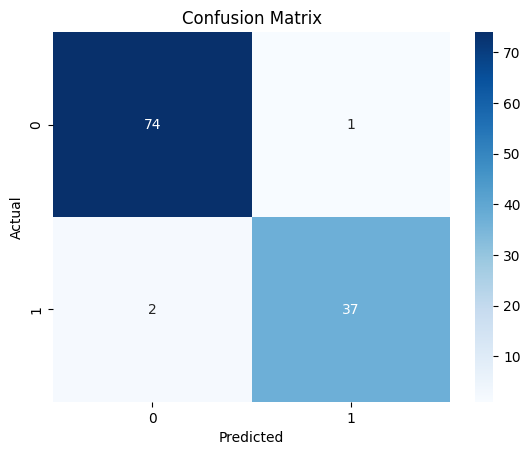

In [48]:
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Classification report (includes precision, recall, f1-score)

In [49]:

print("Classification Report:")
print(classification_report(Y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        75
           1       0.97      0.95      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



ROC CURVE AND ROC AUC

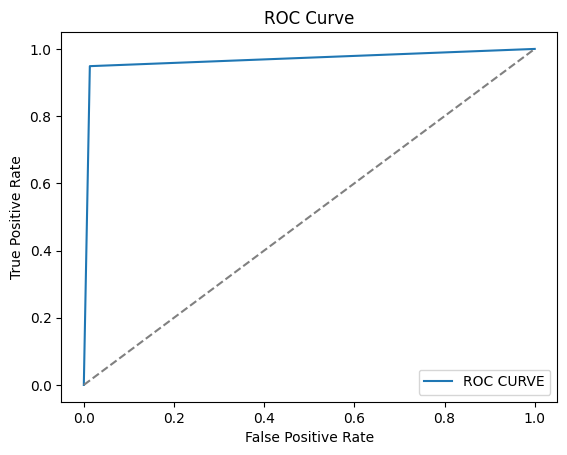

0.9676923076923076


In [51]:
fpr,tpr,thresholds=roc_curve(Y_test,y_pred)
plt.plot(fpr,tpr,label="ROC CURVE")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")#How many actual negatives were wrongly classified as positive.
plt.ylabel("True Positive Rate")#How many actual positives the model correctly identified.
plt.title("ROC Curve")
plt.legend()
plt.show()

#AUC
auc=roc_auc_score(Y_test,y_pred)
print(auc)

AUC Score Range	Interpretation
0.90 – 1.00	🔥 Excellent model

5.Tune threshold and explain sigmoid function.
By def thresh=0.5 but here we set to 0.3 to reduce false negatives or false postives


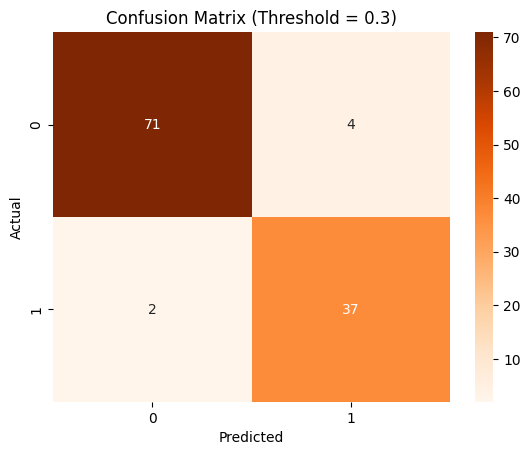

Classification Report with Custom Threshold:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        75
           1       0.90      0.95      0.93        39

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



In [52]:
# Custom threshold
threshold = 0.3
y_custom = (y_prob > threshold).astype(int)

# Confusion matrix with custom threshold
cm_custom = confusion_matrix(Y_test, y_custom)
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Oranges')
plt.title(f"Confusion Matrix (Threshold = {threshold})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# New metrics
print("Classification Report with Custom Threshold:")
print(classification_report(Y_test, y_custom))


THEREFORE DEFAULT THRESH 0.5  IS BETTER 

In [53]:
import pickle

# Save trained model
with open("logistic_model.pkl", "wb") as f:
    pickle.dump(model, f)
# Save the scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
